# Modelo 3 - Random forest

Random forest aplicado sobre los datos de entrenamiento. 

Se divide el dataset de entrenamiento en train y test para probar las métricas del modelo con etiquetas conocidas.

Se lleva acabo el modelo sobre los dataset de los distintos tramientos de variables

"Task complete" check para cada uno de ellos.

- Tratamiento 1
- Tratamiento 2
- Tratamiento 3
- Tratamiento 4


#### Paquetes



In [55]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score



#### Funciones



In [56]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(12,10))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], "k--")
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive rate")
    
def plot_feature_importances(model, max_num_features = 10):
    plt.figure(figsize=(10,80))
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

## Datos tratamiento 1

In [57]:
%store -r newtrain_t1
newtrain_t1.head(5)

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  DebtRatio  \
tr 0                 1                              0.766127   0.802982   
   1                 0                              0.957151   0.121876   
   2                 0                              0.658180   0.085113   
   3                 0                              0.233810   0.036050   
   4                 0                              0.907239   0.024926   

      age_21  age_22  age_23  age_24  age_25  age_26  age_27    ...     \
tr 0       0       0       0       0       0       0       0    ...      
   1       0       0       0       0       0       0       0    ...      
   2       0       0       0       0       0       0       0    ...      
   3       0       0       0       0       0       0       0    ...      
   4       0       0       0       0       0       0       0    ...      

      Rent_(2044.0, 3000.0]  Rent_(3000.0, 3800.0]  Rent_(3800.0, 4550.0]  \
tr 0                      0                      0                      0   
   1                      1                      0                      0   
   2                      0                      1                      0   
   3                      0                      1                      0   
   4                      0                      0                      0   

      Rent_(4550.0, 5400.0]  Rent_(5400.0, 6300.0]  Rent_(6300.0, 7500.0]  \
tr 0                      0                      0                      0   
   1                      0                      0                      0   
   2                      0                      0                      0   
   3                      0                      0                      0   
   4                      0                      0                      0   

      Rent_(7500.0, 9060.0]  Rent_(9060.0, 11600.0]  \
tr 0                      0                       1   
   1                      0                       0   
   2                      0                       0   
   3                      0                       0   
   4                      0                       0   

      Rent_(11600.0, 7727000.0]  Rent_nan  
tr 0                          0         0  
   1                          0         0  
   2                          0         0  
   3                          0         0  
   4                          1         0  

[5 rows x 249 columns]

#### Datos train y datos testing

In [58]:
# asignamos variable dependiente e independiente
X = newtrain_t1.iloc[:,1:] # features
y = newtrain_t1.iloc[:,0] # variable target

In [59]:
# Definimos cada una de las partes. Entrenamos con el 70% de las obs.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [60]:
# 105K obs en train, 45 K en test
# 248 variables
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(105000, 248)
(45000, 248)
(105000,)
(45000,)


#### Random Forest

#####  1) Entrenamiento

In [61]:
# training
forest = RandomForestClassifier(random_state=0,n_estimators=300, max_depth=5, class_weight="balanced")
forest.fit(X_train,y_train) # profundidad max 5


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

AUC Score 0.8537316521506927


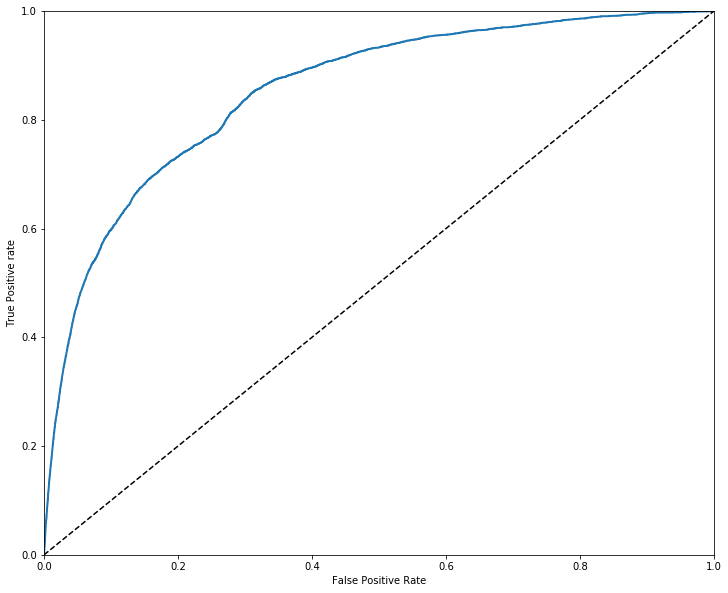

In [62]:
# prediction sobre training
y_scores_proba = forest.predict_proba(X_train)
y_scores = y_scores_proba[:,1]
fpr, tpr, thresh = roc_curve(y_train, y_scores)
plot_roc_curve(fpr,tpr)
print("AUC Score {}".format(roc_auc_score(y_train,y_scores)))

**Importancia de las variables**

In [63]:
# plot_feature_importances(forest)

#####  2) Validación

AUC Score 0.8412655639329157


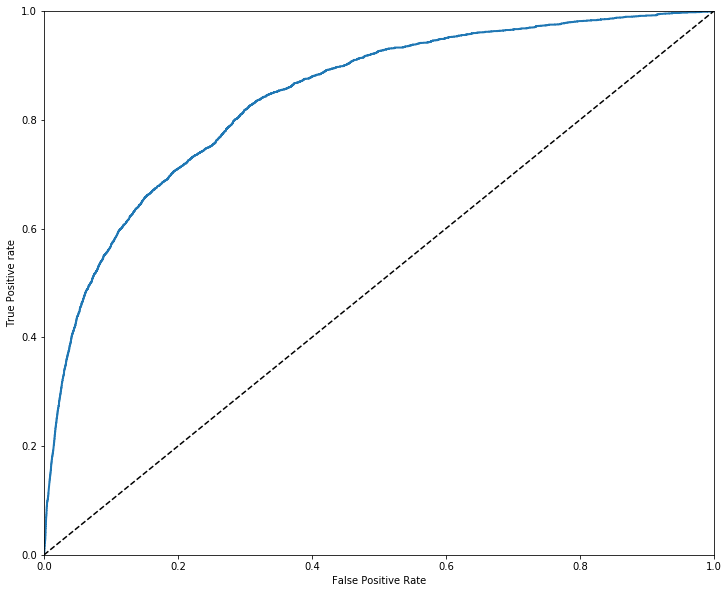

In [64]:
y_test_proba = forest.predict_proba(X_test)
y_scores_test = y_test_proba[:,1]
fpr_test, tpr_test, thresh_test = roc_curve(y_test, y_scores_test)
plot_roc_curve(fpr_test,tpr_test)
print("AUC Score {}".format(roc_auc_score(y_test,y_scores_test)))

In [65]:
# Matriz de confusión
y_pred_test=forest.predict(X_test)
cnf_matrix_RF = metrics.confusion_matrix(y_test, y_pred_test)
cnf_matrix_RF

array([[31034, 10931],
       [  711,  2324]], dtype=int64)

In [66]:
# Métricas
metricas_RF_t1 = classification_report(y_test, y_pred_test)

print(metricas_RF_t1)

             precision    recall  f1-score   support

          0       0.98      0.74      0.84     41965
          1       0.18      0.77      0.29      3035

avg / total       0.92      0.74      0.80     45000



In [67]:
# coeficiente de determinación
r2_score(y_test, y_pred_test)

-3.1133359936920835

![title](imagen/task.png)

## Datos tratamiento 2

In [68]:
%store -r newtrain_t2
newtrain_t2.head(5)

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  DebtRatio  \
tr 0                 1                              0.766127   0.802982   
   1                 0                              0.957151   0.121876   
   2                 0                              0.658180   0.085113   
   3                 0                              0.233810   0.036050   
   4                 0                              0.907239   0.024926   

      MonthlyIncome  age_21  age_22  age_23  age_24  age_25  age_26    ...     \
tr 0         9120.0       0       0       0       0       0       0    ...      
   1         2600.0       0       0       0       0       0       0    ...      
   2         3042.0       0       0       0       0       0       0    ...      
   3         3300.0       0       0       0       0       0       0    ...      
   4        63588.0       0       0       0       0       0       0    ...      

      nDep_5.0  nDep_6.0  nDep_7.0  nDep_8.0  nDep_9.0  nDep_10.0  nDep_13.0  \
tr 0         0         0         0         0         0          0          0   
   1         0         0         0         0         0          0          0   
   2         0         0         0         0         0          0          0   
   3         0         0         0         0         0          0          0   
   4         0         0         0         0         0          0          0   

      nDep_20.0  nDep_43.0  nDep_nan  
tr 0          0          0         0  
   1          0          0         0  
   2          0          0         0  
   3          0          0         0  
   4          0          0         0  

[5 rows x 216 columns]

#### Datos train y datos testing

In [69]:
# asignamos variable dependiente e independiente
X = newtrain_t2.iloc[:,1:] # features
y = newtrain_t2.iloc[:,0] # variable target

In [70]:
# Definimos cada una de las partes. Entrenamos con el 70% de las obs.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [71]:
# 105K obs en train, 45 K en test
# 215 variables
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(105000, 215)
(45000, 215)
(105000,)
(45000,)


#### Random Forest

#####  1) Entrenamiento

In [72]:
# training
forest = RandomForestClassifier(random_state=0,n_estimators=300, max_depth=5, class_weight="balanced")
forest.fit(X_train,y_train) # profundidad max 5


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

AUC Score 0.8458557607614874


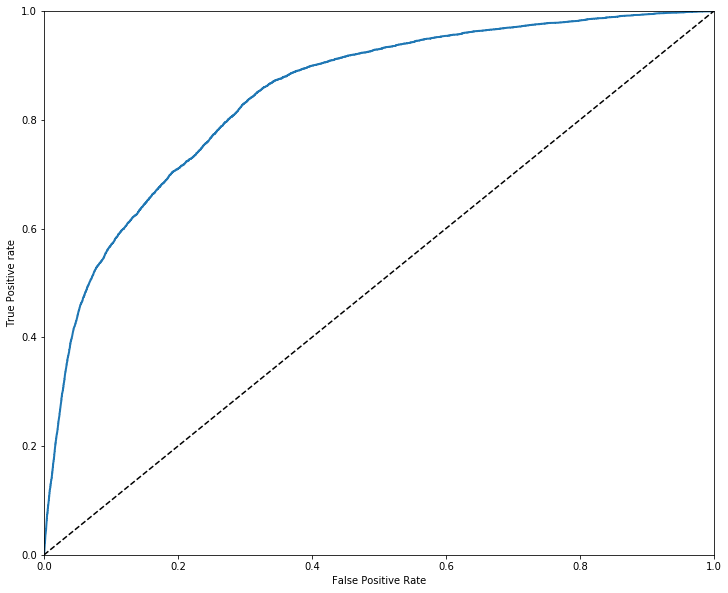

In [73]:
# prediction sobre training
y_scores_proba = forest.predict_proba(X_train)
y_scores = y_scores_proba[:,1]
fpr, tpr, thresh = roc_curve(y_train, y_scores)
plot_roc_curve(fpr,tpr)
print("AUC Score {}".format(roc_auc_score(y_train,y_scores)))

**Importancia de las variables**

In [74]:
# plot_feature_importances(forest)

#####  2) Validación

AUC Score 0.8329396486559856


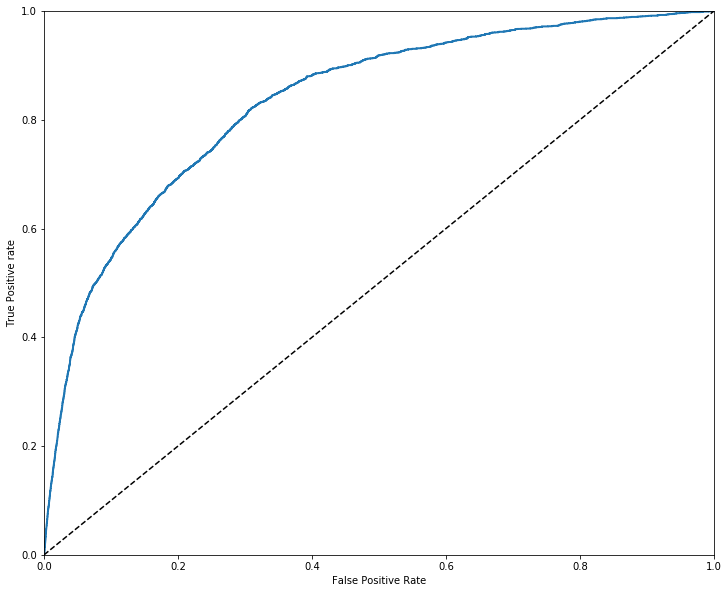

In [75]:
y_test_proba = forest.predict_proba(X_test)
y_scores_test = y_test_proba[:,1]
fpr_test, tpr_test, thresh_test = roc_curve(y_test, y_scores_test)
plot_roc_curve(fpr_test,tpr_test)
print("AUC Score {}".format(roc_auc_score(y_test,y_scores_test)))

In [76]:
# Matriz de confusión
y_pred_test=forest.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_test)
cnf_matrix

array([[30807, 11158],
       [  709,  2326]], dtype=int64)

In [77]:
# Métricas
metricas_RF_t2 = classification_report(y_test, y_pred_test)

print(metricas_RF_t2)

             precision    recall  f1-score   support

          0       0.98      0.73      0.84     41965
          1       0.17      0.77      0.28      3035

avg / total       0.92      0.74      0.80     45000



In [78]:
# coeficiente de determinación
r2_score(y_test, y_pred_test)

-3.1928326951678363

![title](imagen/task.png)

## Datos tratamiento 3

In [79]:
%store -r newtrain_t3
newtrain_t3.head(5)

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  DebtRatio  \
tr 0                 1                              0.766127   0.802982   
   1                 0                              0.957151   0.121876   
   2                 0                              0.658180   0.085113   
   3                 0                              0.233810   0.036050   
   4                 0                              0.907239   0.024926   

      MonthlyIncome  age_21  age_22  age_23  age_24  age_25  age_26    ...     \
tr 0         9120.0       0       0       0       0       0       0    ...      
   1         2600.0       0       0       0       0       0       0    ...      
   2         3042.0       0       0       0       0       0       0    ...      
   3         3300.0       0       0       0       0       0       0    ...      
   4        63588.0       0       0       0       0       0       0    ...      

      nDep_5.0  nDep_6.0  nDep_7.0  nDep_8.0  nDep_9.0  nDep_10.0  nDep_13.0  \
tr 0         0         0         0         0         0          0          0   
   1         0         0         0         0         0          0          0   
   2         0         0         0         0         0          0          0   
   3         0         0         0         0         0          0          0   
   4         0         0         0         0         0          0          0   

      nDep_20.0  nDep_43.0  nDep_nan  
tr 0          0          0         0  
   1          0          0         0  
   2          0          0         0  
   3          0          0         0  
   4          0          0         0  

[5 rows x 197 columns]

#### Datos train y datos testing

In [80]:
# asignamos variable dependiente e independiente
X = newtrain_t3.iloc[:,1:] # features
y = newtrain_t3.iloc[:,0] # variable target

In [81]:
# Definimos cada una de las partes. Entrenamos con el 70% de las obs.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)


In [82]:
# 105K obs en train, 45 K en test
# 196 variables
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(105000, 196)
(45000, 196)
(105000,)
(45000,)


#### Random Forest

#####  1) Entrenamiento

In [83]:
# training
forest = RandomForestClassifier(random_state=0,n_estimators=300, max_depth=5, class_weight="balanced")
forest.fit(X_train,y_train) # profundidad max 5


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

AUC Score 0.8463671986755953


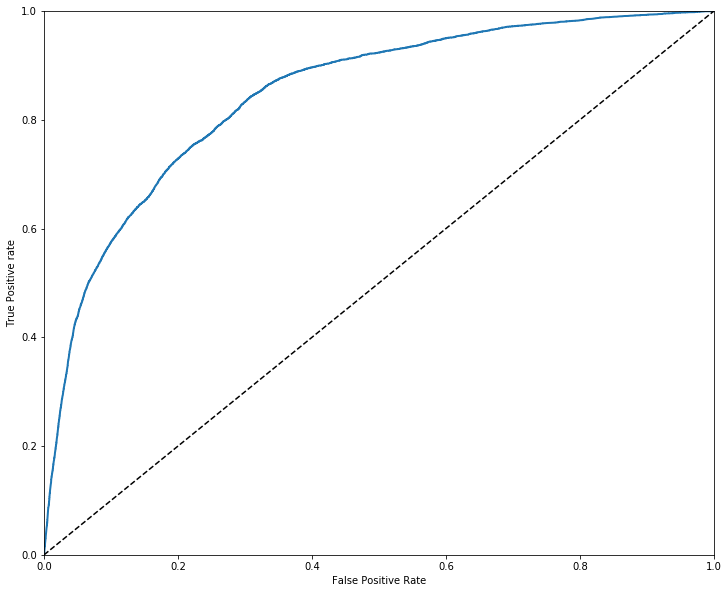

In [84]:
# prediction sobre training
y_scores_proba = forest.predict_proba(X_train)
y_scores = y_scores_proba[:,1]
fpr, tpr, thresh = roc_curve(y_train, y_scores)
plot_roc_curve(fpr,tpr)
print("AUC Score {}".format(roc_auc_score(y_train,y_scores)))

**Importancia de las variables**

In [85]:
# plot_feature_importances(forest)

#####  2) Validación

AUC Score 0.8328276701911512


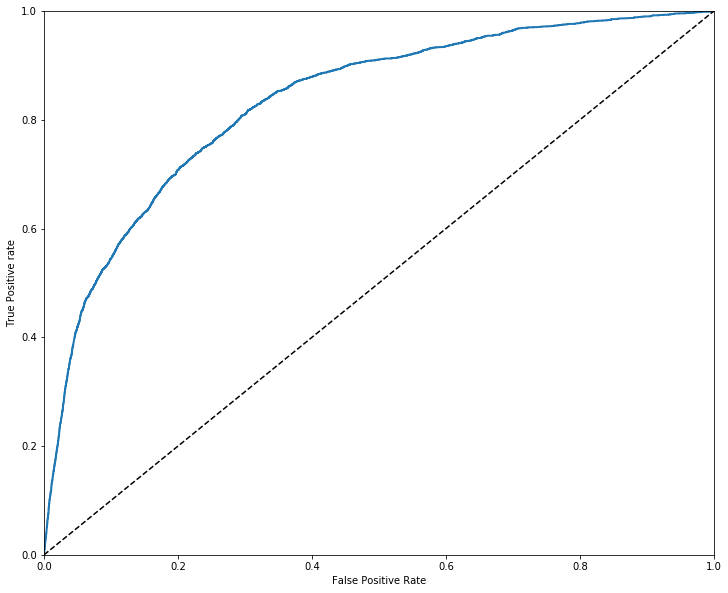

In [86]:
y_test_proba = forest.predict_proba(X_test)
y_scores_test = y_test_proba[:,1]
fpr_test, tpr_test, thresh_test = roc_curve(y_test, y_scores_test)
plot_roc_curve(fpr_test,tpr_test)
print("AUC Score {}".format(roc_auc_score(y_test,y_scores_test)))

In [87]:
# Matriz de confusión
y_pred_test=forest.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_test)
cnf_matrix

array([[30609, 11356],
       [  672,  2363]], dtype=int64)

In [88]:
# Métricas
metricas_RF_t3 = classification_report(y_test, y_pred_test)

print(metricas_RF_t3)

             precision    recall  f1-score   support

          0       0.98      0.73      0.84     41965
          1       0.17      0.78      0.28      3035

avg / total       0.92      0.73      0.80     45000



In [89]:
# coeficiente de determinación
r2_score(y_test, y_pred_test)

-3.249717001557153

![title](imagen/task.png)

## Datos tratamiento 4

In [90]:
%store -r newtrain_t4
newtrain_t4.head(5)

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  DebtRatio  \
tr 0                 1                              0.766127   0.802982   
   1                 0                              0.957151   0.121876   
   2                 0                              0.658180   0.085113   
   3                 0                              0.233810   0.036050   
   4                 0                              0.907239   0.024926   

      age_21  age_22  age_23  age_24  age_25  age_26  age_27    ...     \
tr 0       0       0       0       0       0       0       0    ...      
   1       0       0       0       0       0       0       0    ...      
   2       0       0       0       0       0       0       0    ...      
   3       0       0       0       0       0       0       0    ...      
   4       0       0       0       0       0       0       0    ...      

      Rent_(2044.0, 3000.0]  Rent_(3000.0, 3800.0]  Rent_(3800.0, 4550.0]  \
tr 0                      0                      0                      0   
   1                      1                      0                      0   
   2                      0                      1                      0   
   3                      0                      1                      0   
   4                      0                      0                      0   

      Rent_(4550.0, 5400.0]  Rent_(5400.0, 6300.0]  Rent_(6300.0, 7500.0]  \
tr 0                      0                      0                      0   
   1                      0                      0                      0   
   2                      0                      0                      0   
   3                      0                      0                      0   
   4                      0                      0                      0   

      Rent_(7500.0, 9060.0]  Rent_(9060.0, 11600.0]  \
tr 0                      0                       1   
   1                      0                       0   
   2                      0                       0   
   3                      0                       0   
   4                      0                       0   

      Rent_(11600.0, 7727000.0]  Rent_nan  
tr 0                          0         0  
   1                          0         0  
   2                          0         0  
   3                          0         0  
   4                          1         0  

[5 rows x 206 columns]

#### Datos train y datos testing

In [91]:
# asignamos variable dependiente e independiente
X = newtrain_t4.iloc[:,1:] # features
y = newtrain_t4.iloc[:,0] # variable target

In [92]:
# Definimos cada una de las partes. Entrenamos con el 70% de las obs.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)


In [93]:
# 105K obs en train, 45 K en test
# 205 variables
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(105000, 205)
(45000, 205)
(105000,)
(45000,)


#### Random Forest

#####  1) Entrenamiento

In [94]:
# training
forest = RandomForestClassifier(random_state=0,n_estimators=300, max_depth=5, class_weight="balanced")
forest.fit(X_train,y_train) # profundidad max 5


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

AUC Score 0.8463585235945545


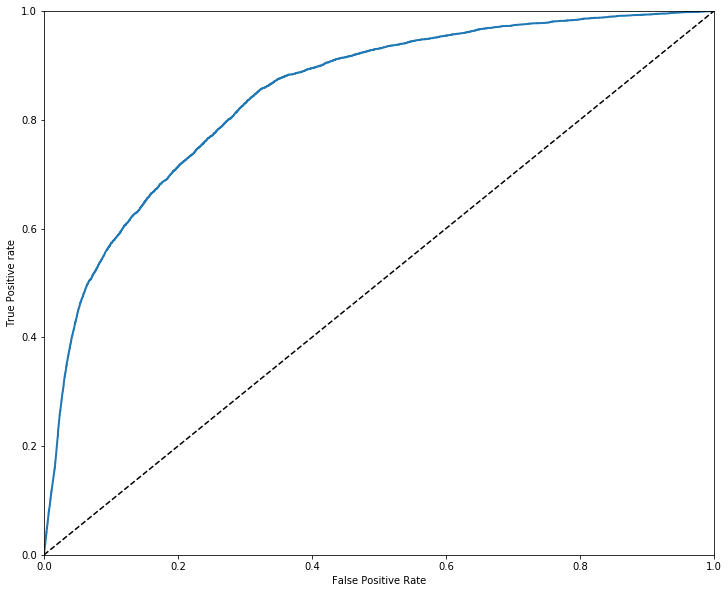

In [95]:
# prediction sobre training
y_scores_proba = forest.predict_proba(X_train)
y_scores = y_scores_proba[:,1]
fpr, tpr, thresh = roc_curve(y_train, y_scores)
plot_roc_curve(fpr,tpr)
print("AUC Score {}".format(roc_auc_score(y_train,y_scores)))

**Importancia de las variables**

In [96]:
# plot_feature_importances(forest)

#####  2) Validación

AUC Score 0.8335745426829567


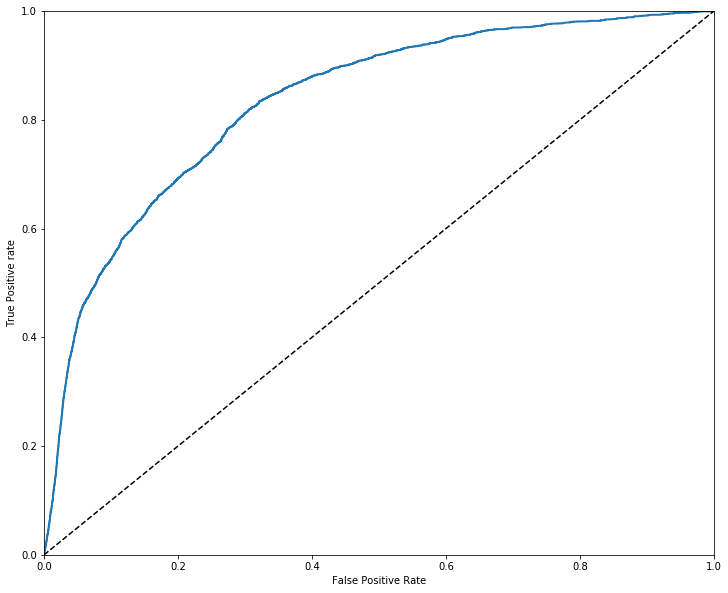

In [97]:
y_test_proba = forest.predict_proba(X_test)
y_scores_test = y_test_proba[:,1]
fpr_test, tpr_test, thresh_test = roc_curve(y_test, y_scores_test)
plot_roc_curve(fpr_test,tpr_test)
print("AUC Score {}".format(roc_auc_score(y_test,y_scores_test)))

In [98]:
# Matriz de confusión
y_pred_test=forest.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_test)
cnf_matrix

array([[30627, 11338],
       [  686,  2349]], dtype=int64)

In [99]:
# Métricas
metricas_RF_t4 = classification_report(y_test, y_pred_test)

print(metricas_RF_t4)

             precision    recall  f1-score   support

          0       0.98      0.73      0.84     41965
          1       0.17      0.77      0.28      3035

avg / total       0.92      0.73      0.80     45000



In [100]:
# coeficiente de determinación
r2_score(y_test, y_pred_test)

-3.2483037268642514

![title](imagen/task.png)

<div class="alert alert-block alert-info">
<b>Conclusiones</b> 
</div>

#### Tratamiento 1

In [101]:
metricas_RF_t1 # métricas modelo logístico con datos tratamiento 1

'             precision    recall  f1-score   support\n\n          0       0.98      0.74      0.84     41965\n          1       0.18      0.77      0.29      3035\n\navg / total       0.92      0.74      0.80     45000\n'

In [102]:
%store metricas_RF_t1

Stored 'metricas_RF_t1' (str)


In [103]:
%store cnf_matrix_RF

Stored 'cnf_matrix_RF' (ndarray)


#### Tratamiento 2

In [104]:
metricas_RF_t2 # métricas modelo logístico con datos tratamiento 2

'             precision    recall  f1-score   support\n\n          0       0.98      0.73      0.84     41965\n          1       0.17      0.77      0.28      3035\n\navg / total       0.92      0.74      0.80     45000\n'

In [105]:
%store metricas_RF_t2

Stored 'metricas_RF_t2' (str)


#### Tratamiento 3

In [106]:
metricas_RF_t3  # métricas modelo logístico con datos tratamiento 3

'             precision    recall  f1-score   support\n\n          0       0.98      0.73      0.84     41965\n          1       0.17      0.78      0.28      3035\n\navg / total       0.92      0.73      0.80     45000\n'

In [107]:
%store metricas_RF_t3

Stored 'metricas_RF_t3' (str)


#### Tratamiento 4

In [108]:
metricas_RF_t4 # métricas modelo logístico con datos tratamiento 4

'             precision    recall  f1-score   support\n\n          0       0.98      0.73      0.84     41965\n          1       0.17      0.77      0.28      3035\n\navg / total       0.92      0.73      0.80     45000\n'

In [109]:
%store metricas_RF_t4

Stored 'metricas_RF_t4' (str)
